# mission 2: [심화] 한국 이미지(음식) 데이터 셋을 분류

2-1: mission 2의 결과를 분석한다.
(맞춘 샘플의 공통점, 틀린 샘플의 공통점, 맞춘/틀린 샘플들의 차이점)

2-2: 2-1의 분석을 기반으로 성능 향상을 위한 작업을 수행한다.
(아키텍쳐 변경 etc)

2-3 : 선택지의 성능 경향을 파악한다.

작성자: 장우진 수정

In [ ]:
# 데이터 폴더 연결
# 이미지 파일을 불러오기 위해서 꼭 해야 함
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##mission1

In [ ]:
import os
import random

# 이미지 관련 모듈
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow

In [ ]:
# 이미지가 있는 폴더의 경로 설정
folder_path = '/content/drive/MyDrive/dataset/all_train_data'
train_data_dir = '/content/drive/MyDrive/dataset/all_train_data'
val_data_dir = '/content/drive/MyDrive/dataset/val'

In [ ]:
def check_image_size(folder_path):
    # 최대 이미지 사이즈 확인
    # 이미지 정보가 바뀐 경우에만 최대 사이즈를 확인하기 위해 수행할 것. 매번 수행할 필요없음.
    available_image_format = ('.jpg', '.jpeg', '.png')
    max_height = 0
    max_width = 0
    for idx, class_folder in enumerate(os.listdir(folder_path)):
        class_path = os.path.join(folder_path, class_folder)
        if os.path.isdir(class_path):
            for filename in os.listdir(class_path):
                if filename.endswith(available_image_format):
                    img = cv2.imread(os.path.join(class_path, filename))
                    # img = mpimg.imread(os.path.join(class_path, filename))
                    if img is not None:
                        height, width, channels = img.shape
                        if height > max_height:
                            max_height = height
                        if width > max_width:
                            max_width = width

    print("최대 height: {}".format(max_height))
    print("최대 width: {}".format(max_width))
    # 최대 height: 4160
    # 최대 width: 6048

In [ ]:
def check_prob(prob):
    """
    주어진 확률 prob 보다 작으면 Treu를 크면 False를 리턴
    """
    # 0에서 1 사이의 난수 생성
    random_value = random.random()

    # 확률에 따라 이벤트 선택
    if random_value <= prob:
    # 이벤트 선택 (0.8 확률)
        ret = True
    else:
        # 이벤트 선택하지 않음 (0.2 확률)
        ret = False

    return ret


def generate_data_and_label_from_folder(folder_path, prob):
    """
    폴더의 정보로 학습 정보를 생성한다.
    파이토치를 사용할 수 있게, 이미지 이름을 train과 test로 분리하여 저장한다.
    폴더 순서를 이미지의 label로 사용한다.

    return:
      - image_path_train: train 용 이미지 파일 이름(경로 포함)
      - image_path_test: train 용 이미지 파일 이름(경로 포함)
      - labels_train: train용 이미지의 label
      - labels_test: test용 이미지의 label
      - food_name: label에 해당하는 음식 이름을 저장한 딕셔너리
    """
    available_image_format = ('.jpg', '.jpeg', '.png')
    image_path_train = []
    image_path_test = []
    labels_train = []
    labels_test = []
    food_name = {}
    class_folders = os.listdir(folder_path)

    for idx, class_folder in enumerate(class_folders):
        class_path = os.path.join(folder_path, class_folder)
        if os.path.isdir(class_path):
            for filename in os.listdir(class_path):
                if filename.endswith(available_image_format):
                    if check_prob(prob):
                        image_path_train.append(os.path.join(class_path, filename))
                        # 클래스 레이블 할당 (0부터 시작)
                        labels_train.append(idx)
                    else:
                        image_path_test.append(os.path.join(class_path, filename))
                        # 클래스 레이블 할당 (0부터 시작)
                        labels_test.append(idx)

                    if idx not in food_name:
                        # label에 해당하는 음식 이름 저장
                        food_name[idx] = class_folder

    return image_path_train, image_path_test, labels_train, labels_test, food_name

In [ ]:
# train 및 test 자료 생성
# train 자료와 test 자료는 8:2로 분리
image_path_train, image_path_test, labels_train, labels_test, food_name = generate_data_and_label_from_folder(folder_path, 0.8)

In [ ]:
def show_images(images, labels, food_name):
    """
    images에서 label에 해당하는 이미지를 하나씩 선택하여 출력한다.
    sample_images = {
      음식이름: 이미지 index,
      ...,
    }
    """
    sample_images = {}

# sample 사용할 이미지의 index 찾기
    for image_idx, label in enumerate(labels):
        if food_name[label] not in sample_images:
            sample_images[food_name[label]] = image_idx

    # 이미지 자료에서 클래스 별 이미지 출력
    fig, axs = plt.subplots(7, 6, figsize=(20, 15))
    axs = axs.ravel()

    for i, (image_name, image_idx) in enumerate(sample_images.items()):
        # 이미지 이름 출력
        axs[i].set_title("클래스 이름: {}".format(image_name))

        # 이미지 읽기
        img = cv2.imread(images[image_idx])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

        axs[i].imshow(img)
        axs[i].axis('off')  # 이미지 축 숨기기

    plt.tight_layout()
    plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

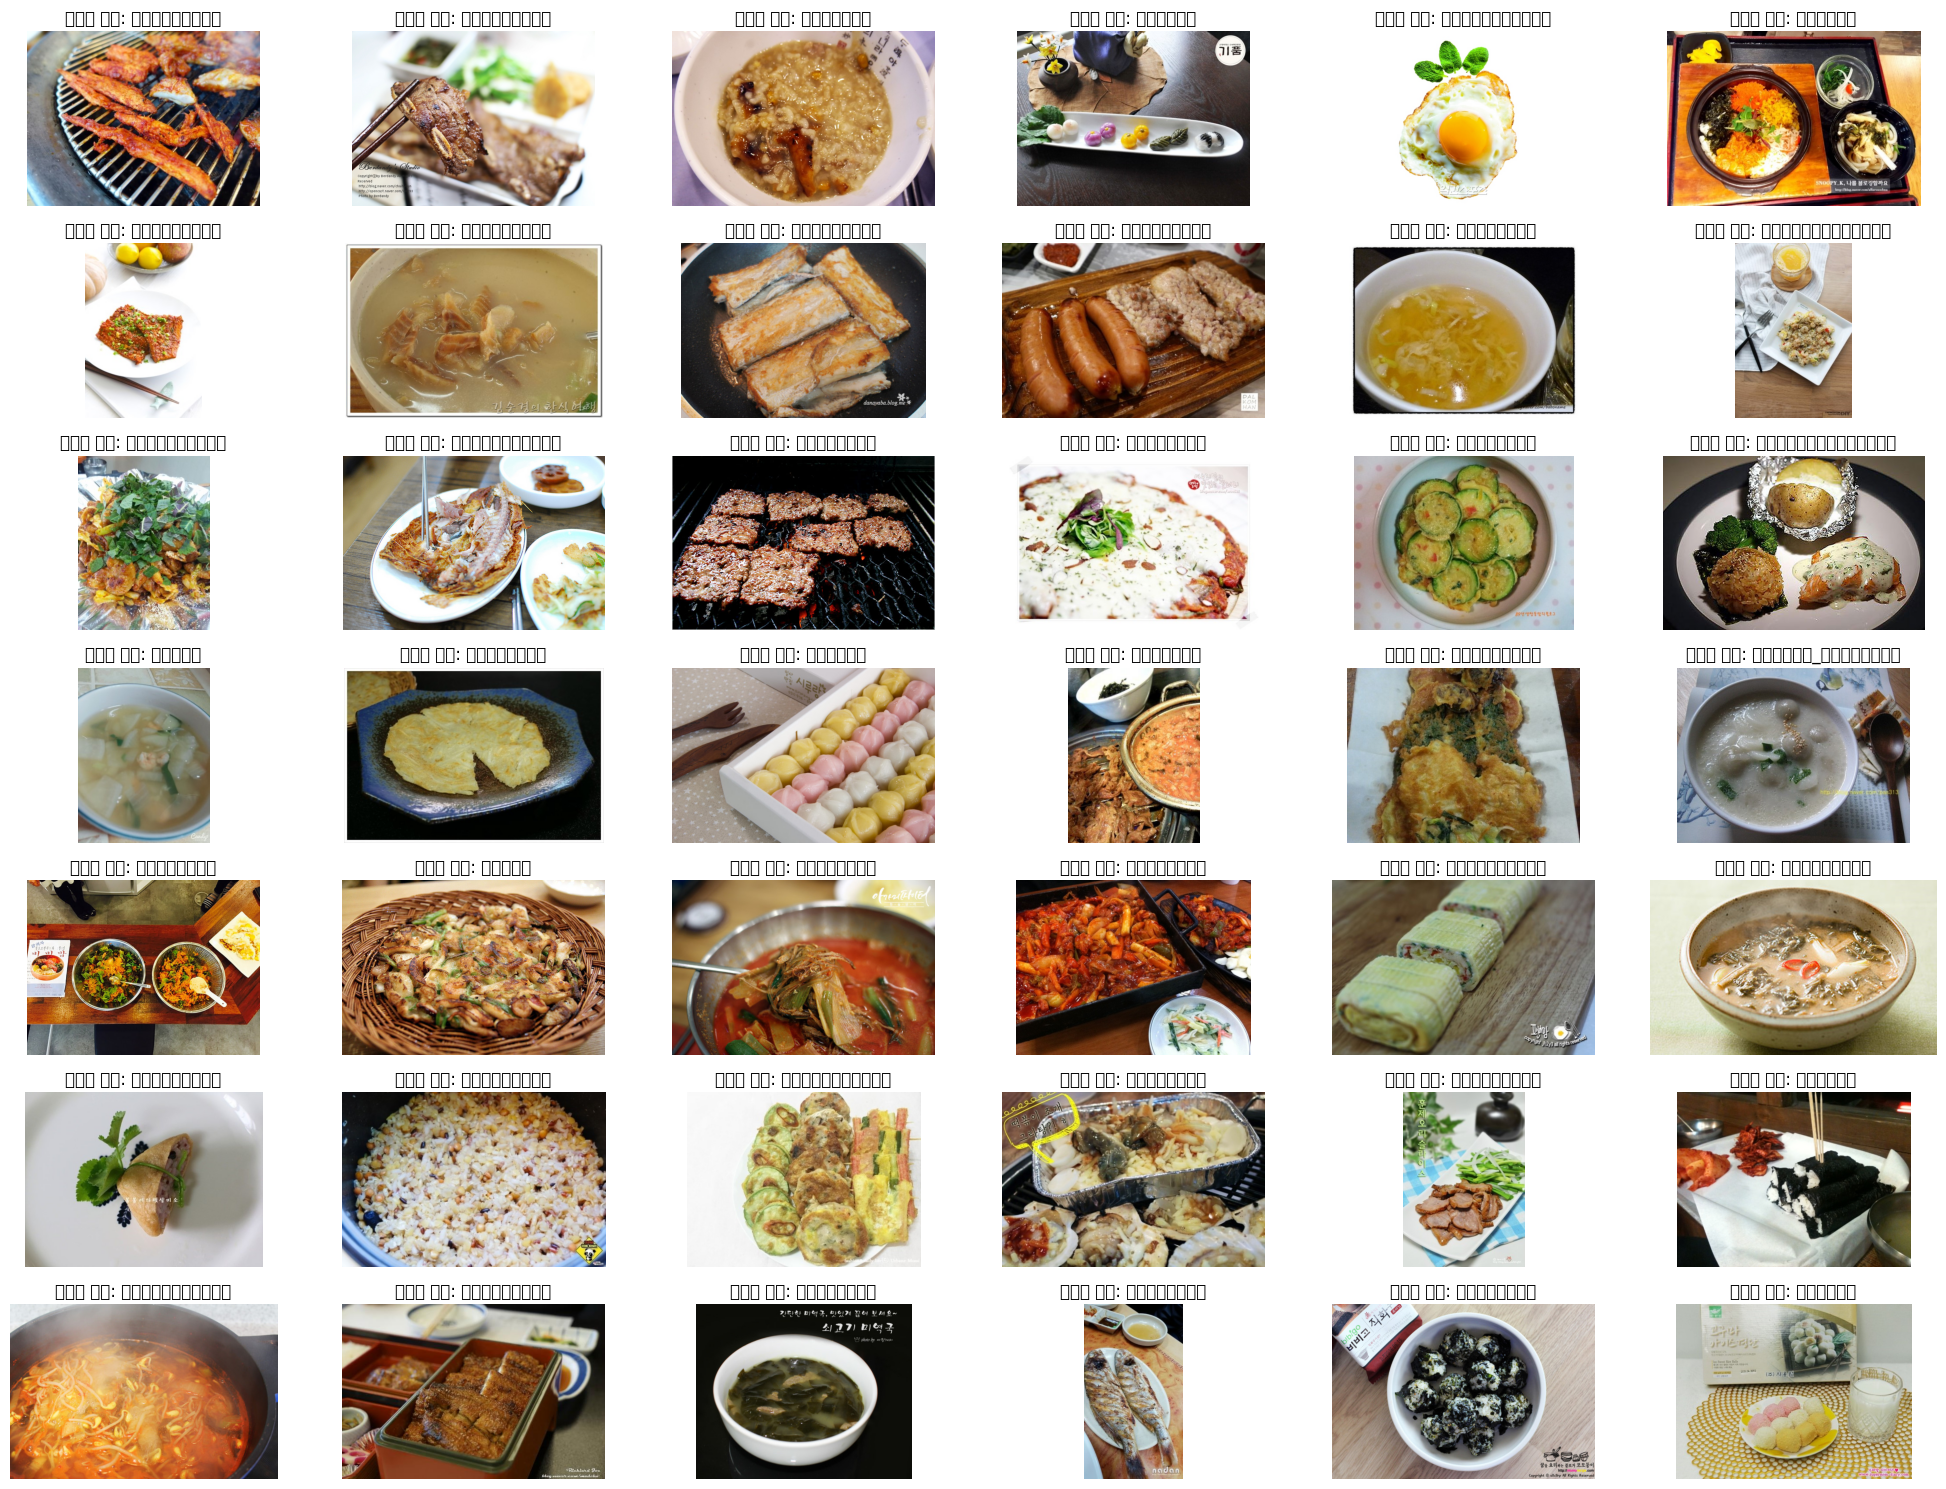

In [ ]:
# 이미지 자료에서 클래스 별 이미지 출력
show_images(image_path_train, labels_train, food_name)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets
from sklearn.model_selection import train_test_split
from PIL import Image

# 데이터 전처리 설정(이미지 크기를 224x224로 조정, PyTorch Tensor로 변환)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# 데이터셋 불러오기
dataset = datasets.ImageFolder(root=train_data_dir, transform=transform)

# 클래스 이름 얻기
class_names = dataset.classes

# 훈련 데이터셋을 훈련 및 테스트 (검증) 데이터셋으로 분할합니다.
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# 데이터셋을 생성합니다.
val_dataset = datasets.ImageFolder(root=val_data_dir, transform=transform)

# 데이터를 훈련 세트와 테스트 세트로 나눕니다. 여기서 test_size는 테스트 세트의 비율을 나타냅니다.
train_images, test_images, train_labels, test_labels = train_test_split(
    dataset.imgs,
    [cls for _, cls in dataset.samples],
    test_size=0.2,
    random_state=42
)

In [ ]:
# 데이터로더 설정
batch_size = 32 # 배치 크기
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

In [ ]:
# 데이터셋으로부터 클래스 이름을 얻습니다.
class_names = train_dataset.dataset.classes

# 데이터로더 및 클래스 이름 출력
print(f"훈련 데이터셋 크기: {len(train_loader.dataset)}")
print(f"테스트 데이터셋 크기: {len(test_loader.dataset)}")
print(f"검증 데이터셋 크기: {len(val_loader.dataset)}")
print(f"클래스 개수: {len(class_names)}")

훈련 데이터셋 크기: 26874
테스트 데이터셋 크기: 6719
검증 데이터셋 크기: 4198
클래스 개수: 42


In [ ]:
# CUDA 사용 가능 여부 확인
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

################################################################################
# 모델 정의 및 학습

# ResNet-18 모델 생성
model = models.resnet18(weights=None)
model.fc = nn.Linear(512, len(class_names))

model.to(device)

# 손실 함수와 최적화 알고리즘 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# 모델 학습
num_epochs = 50

# train_history: epoch 별 loss와 accuracy 저장
# train_history[0]: epoch
# train_history[1]: loss
# train_history[0]: accuracy for test data
train_history = [[], [], []]

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # epoch 종료 후 테스트 데이터에 대한 정확도 계산
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}, Test Accuracy: {100 * correct / total}%')
    train_history[0].append(epoch + 1)
    train_history[1].append(running_loss / (i + 1))
    train_history[0].append(100 * correct / total)

print('Finished Training')

Epoch 1, Loss: 3.2154685585271743, Test Accuracy: 19.735079624944188%
Epoch 2, Loss: 2.7274610928126743, Test Accuracy: 26.96829885399613%
Epoch 3, Loss: 2.424226083925792, Test Accuracy: 31.790445006697425%
Epoch 4, Loss: 2.1723169208992097, Test Accuracy: 38.54740288733443%
Epoch 5, Loss: 1.9862981625965663, Test Accuracy: 40.8096442923054%
Epoch 6, Loss: 1.815564254919688, Test Accuracy: 43.56303021282929%
Epoch 7, Loss: 1.6734296546095893, Test Accuracy: 46.04851912486977%
Epoch 8, Loss: 1.5261450127476737, Test Accuracy: 47.98333085280548%
Epoch 9, Loss: 1.3968454124672072, Test Accuracy: 50.15627325494865%
Epoch 10, Loss: 1.2581795344040507, Test Accuracy: 51.97201964578062%
Epoch 11, Loss: 1.113421750423454, Test Accuracy: 53.296621521059684%
Epoch 12, Loss: 0.9839533109040487, Test Accuracy: 55.52909659175472%
Epoch 13, Loss: 0.8152989833837464, Test Accuracy: 54.427742223545174%
Epoch 14, Loss: 0.6730990248421828, Test Accuracy: 55.558862926030656%
Epoch 15, Loss: 0.5180400099

In [ ]:
# 학습 모델 저장
checkpoint = {
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
}
checkpoint_path = '/content/drive/MyDrive/dataset/mission1.pt'
# 체크포인트 파일 저장
torch.save(checkpoint, checkpoint_path)

In [ ]:
# validation 자료에 대한 정확도 계산
correct = 0
total = 0

# 모델을 평가 모드로 설정
model.eval()

with torch.no_grad():
    for data in val_loader:  # Validation 데이터 로더 사용
        images, labels = data
        outputs = model(images.to(device))  # 모델을 사용하여 예측

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()

val_accuracy = 100 * correct / total
print(f'Validation Accuracy: {val_accuracy}%')

Validation Accuracy: 60.52882324916627%


##mission2_34

In [ ]:
import torch
from torchvision import models
import torch.nn as nn
from torchvision import transforms, datasets
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim

train_data_dir = '/content/drive/MyDrive/dataset/all_train_data'
# checkpoint 파일 불러오기
checkpoint_path = '/content/drive/MyDrive/dataset/mission1.pt'
checkpoint = torch.load(checkpoint_path)

# 데이터 전처리 설정(이미지 크기를 224x224로 조정, PyTorch Tensor로 변환)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# 데이터셋 불러오기
dataset = datasets.ImageFolder(root=train_data_dir, transform=transform)

# 클래스 이름 얻기
class_names = dataset.classes

# 훈련 데이터셋을 훈련 및 테스트 (검증) 데이터셋으로 분할합니다.
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
class_names = train_dataset.dataset.classes
batch_size = 32 # 배치 크기
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# 모델 및 optimizer 정의
model = models.resnet18(weights=None)
model.fc = nn.Linear(512, len(class_names))
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# 모델 및 optimizer 상태 복원
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
correct_samples = []  # 맞춘 샘플을 저장할 리스트
incorrect_samples = []  # 틀린 샘플을 저장할 리스트
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# 모델을 evaluation 모드로 설정
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# 현재 사용 가능한 디바이스 목록 출력
print("사용 가능한 디바이스:", torch.cuda.device_count())

# 현재 디바이스 이름 출력
print("현재 디바이스:", torch.cuda.get_device_name(0))

model.to(device)

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)  # 입력 데이터를 GPU로 보냅니다
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        # 정답과 비교하여 맞춘 샘플과 틀린 샘플 분류
        for i in range(len(images)):
            if predicted[i] == labels[i]:
                correct_samples.append((images[i], labels[i], predicted[i]))
            else:
                incorrect_samples.append((images[i], labels[i], predicted[i]))

사용 가능한 디바이스: 1
현재 디바이스: Tesla T4


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
# 맞춘 샘플과 틀린 샘플의 수 출력
print(f'맞춘 샘플 수: {len(correct_samples)}')
print(f'틀린 샘플 수: {len(incorrect_samples)}')

# 맞춘 샘플과 틀린 샘플 분석
# 이 부분에서 공통점을 찾기 위해 원하는 분석을 수행할 수 있습니다.
# 예를 들어, 이미지 시각화, 클래스 분포 분석, 특징 추출, 등 다양한 방법으로 분석 가능합니다.

# 공통점 분석 결과 출력 또는 다양한 분석 방법을 추가하여 사용할 수 있습니다.

맞춘 샘플 수: 6183
틀린 샘플 수: 536


model change_34

In [ ]:
import os
import random

# 이미지 관련 모듈
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow

In [ ]:
# 이미지가 있는 폴더의 경로 설정
folder_path = '/content/drive/MyDrive/dataset/all_train_data'
train_data_dir = '/content/drive/MyDrive/dataset/all_train_data'
val_data_dir = '/content/drive/MyDrive/dataset/val'

In [ ]:
def check_image_size(folder_path):
    # 최대 이미지 사이즈 확인
    # 이미지 정보가 바뀐 경우에만 최대 사이즈를 확인하기 위해 수행할 것. 매번 수행할 필요없음.
    available_image_format = ('.jpg', '.jpeg', '.png')
    max_height = 0
    max_width = 0
    for idx, class_folder in enumerate(os.listdir(folder_path)):
        class_path = os.path.join(folder_path, class_folder)
        if os.path.isdir(class_path):
            for filename in os.listdir(class_path):
                if filename.endswith(available_image_format):
                    img = cv2.imread(os.path.join(class_path, filename))
                    # img = mpimg.imread(os.path.join(class_path, filename))
                    if img is not None:
                        height, width, channels = img.shape
                        if height > max_height:
                            max_height = height
                        if width > max_width:
                            max_width = width

    print("최대 height: {}".format(max_height))
    print("최대 width: {}".format(max_width))
    # 최대 height: 4160
    # 최대 width: 6048

In [ ]:
def check_prob(prob):
    """
    주어진 확률 prob 보다 작으면 Treu를 크면 False를 리턴
    """
    # 0에서 1 사이의 난수 생성
    random_value = random.random()

    # 확률에 따라 이벤트 선택
    if random_value <= prob:
    # 이벤트 선택 (0.8 확률)
        ret = True
    else:
        # 이벤트 선택하지 않음 (0.2 확률)
        ret = False

    return ret


def generate_data_and_label_from_folder(folder_path, prob):
    """
    폴더의 정보로 학습 정보를 생성한다.
    파이토치를 사용할 수 있게, 이미지 이름을 train과 test로 분리하여 저장한다.
    폴더 순서를 이미지의 label로 사용한다.

    return:
      - image_path_train: train 용 이미지 파일 이름(경로 포함)
      - image_path_test: train 용 이미지 파일 이름(경로 포함)
      - labels_train: train용 이미지의 label
      - labels_test: test용 이미지의 label
      - food_name: label에 해당하는 음식 이름을 저장한 딕셔너리
    """
    available_image_format = ('.jpg', '.jpeg', '.png')
    image_path_train = []
    image_path_test = []
    labels_train = []
    labels_test = []
    food_name = {}
    class_folders = os.listdir(folder_path)

    for idx, class_folder in enumerate(class_folders):
        class_path = os.path.join(folder_path, class_folder)
        if os.path.isdir(class_path):
            for filename in os.listdir(class_path):
                if filename.endswith(available_image_format):
                    if check_prob(prob):
                        image_path_train.append(os.path.join(class_path, filename))
                        # 클래스 레이블 할당 (0부터 시작)
                        labels_train.append(idx)
                    else:
                        image_path_test.append(os.path.join(class_path, filename))
                        # 클래스 레이블 할당 (0부터 시작)
                        labels_test.append(idx)

                    if idx not in food_name:
                        # label에 해당하는 음식 이름 저장
                        food_name[idx] = class_folder

    return image_path_train, image_path_test, labels_train, labels_test, food_name

In [ ]:
# train 및 test 자료 생성
# train 자료와 test 자료는 8:2로 분리
image_path_train, image_path_test, labels_train, labels_test, food_name = generate_data_and_label_from_folder(folder_path, 0.8)

In [ ]:
def show_images(images, labels, food_name):
    """
    images에서 label에 해당하는 이미지를 하나씩 선택하여 출력한다.
    sample_images = {
      음식이름: 이미지 index,
      ...,
    }
    """
    sample_images = {}

# sample 사용할 이미지의 index 찾기
    for image_idx, label in enumerate(labels):
        if food_name[label] not in sample_images:
            sample_images[food_name[label]] = image_idx

    # 이미지 자료에서 클래스 별 이미지 출력
    fig, axs = plt.subplots(7, 6, figsize=(20, 15))
    axs = axs.ravel()

    for i, (image_name, image_idx) in enumerate(sample_images.items()):
        # 이미지 이름 출력
        axs[i].set_title("클래스 이름: {}".format(image_name))

        # 이미지 읽기
        img = cv2.imread(images[image_idx])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

        axs[i].imshow(img)
        axs[i].axis('off')  # 이미지 축 숨기기

    plt.tight_layout()
    plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets
from sklearn.model_selection import train_test_split
from PIL import Image

# 데이터 전처리 설정(이미지 크기를 224x224로 조정, PyTorch Tensor로 변환)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# 데이터셋 불러오기
dataset = datasets.ImageFolder(root=train_data_dir, transform=transform)

# 클래스 이름 얻기
class_names = dataset.classes

# 훈련 데이터셋을 훈련 및 테스트 (검증) 데이터셋으로 분할합니다.
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# 데이터셋을 생성합니다.
val_dataset = datasets.ImageFolder(root=val_data_dir, transform=transform)

# 데이터를 훈련 세트와 테스트 세트로 나눕니다. 여기서 test_size는 테스트 세트의 비율을 나타냅니다.
train_images, test_images, train_labels, test_labels = train_test_split(
    dataset.imgs,
    [cls for _, cls in dataset.samples],
    test_size=0.2,
    random_state=42
)

In [ ]:
# 데이터로더 설정
batch_size = 32 # 배치 크기
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

In [ ]:
# 데이터셋으로부터 클래스 이름을 얻습니다.
class_names = train_dataset.dataset.classes

# 데이터로더 및 클래스 이름 출력
print(f"훈련 데이터셋 크기: {len(train_loader.dataset)}")
print(f"테스트 데이터셋 크기: {len(test_loader.dataset)}")
print(f"검증 데이터셋 크기: {len(val_loader.dataset)}")
print(f"클래스 개수: {len(class_names)}")

훈련 데이터셋 크기: 26874
테스트 데이터셋 크기: 6719
검증 데이터셋 크기: 4198
클래스 개수: 42


In [ ]:
# CUDA 사용 가능 여부 확인
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

################################################################################
# 모델 정의 및 학습

# ResNet-34 모델 생성
model = models.resnet34(weights=None)
model.fc = nn.Linear(512, len(class_names))

model.to(device)

# 손실 함수와 최적화 알고리즘 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# 모델 학습
num_epochs = 50

# train_history: epoch 별 loss와 accuracy 저장
# train_history[0]: epoch
# train_history[1]: loss
# train_history[0]: accuracy for test data
train_history = [[], [], []]

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # epoch 종료 후 테스트 데이터에 대한 정확도 계산
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}, Test Accuracy: {100 * correct / total}%')
    train_history[0].append(epoch + 1)
    train_history[1].append(running_loss / (i + 1))
    train_history[0].append(100 * correct / total)

print('Finished Training')

Epoch 1, Loss: 3.2565273432504562, Test Accuracy: 17.75561839559458%
Epoch 2, Loss: 2.7289971277827307, Test Accuracy: 25.59904747730317%
Epoch 3, Loss: 2.388864828575225, Test Accuracy: 30.525375799970234%
Epoch 4, Loss: 2.120716473176366, Test Accuracy: 38.32415538026492%
Epoch 5, Loss: 1.899230441309157, Test Accuracy: 42.670040184551276%
Epoch 6, Loss: 1.7083680316096261, Test Accuracy: 45.438309272213125%
Epoch 7, Loss: 1.5353929792131698, Test Accuracy: 46.68849531180235%
Epoch 8, Loss: 1.3714286698471931, Test Accuracy: 47.81961601428784%
Epoch 9, Loss: 1.1998255934034074, Test Accuracy: 47.5219526715285%
Epoch 10, Loss: 1.0288647403674467, Test Accuracy: 50.766483107605296%
Epoch 11, Loss: 0.8419552801265603, Test Accuracy: 49.82884357791338%
Epoch 12, Loss: 0.6576991254197699, Test Accuracy: 51.57017413305552%
Epoch 13, Loss: 0.4974815394729376, Test Accuracy: 50.36463759488019%
Epoch 14, Loss: 0.3689867867334258, Test Accuracy: 50.870665277571064%
Epoch 15, Loss: 0.2591785598

In [ ]:
# 학습 모델 저장
checkpoint = {
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
}
checkpoint_path = '/content/drive/MyDrive/dataset/mission2.pt'
# 체크포인트 파일 저장
torch.save(checkpoint, checkpoint_path)

In [ ]:
# validation 자료에 대한 정확도 계산
correct = 0
total = 0

# 모델을 평가 모드로 설정
model.eval()

with torch.no_grad():
    for data in val_loader:  # Validation 데이터 로더 사용
        images, labels = data
        outputs = model(images.to(device))  # 모델을 사용하여 예측

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()

val_accuracy = 100 * correct / total
print(f'Validation Accuracy: {val_accuracy}%')

Validation Accuracy: 59.71891376846117%


##mission2_50

In [ ]:
import torch
from torchvision import models
import torch.nn as nn
from torchvision import transforms, datasets
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim

train_data_dir = '/content/drive/MyDrive/dataset/all_train_data'
# checkpoint 파일 불러오기
checkpoint_path = '/content/drive/MyDrive/dataset/mission2.pt'
checkpoint = torch.load(checkpoint_path)

# 데이터 전처리 설정(이미지 크기를 224x224로 조정, PyTorch Tensor로 변환)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# 데이터셋 불러오기
dataset = datasets.ImageFolder(root=train_data_dir, transform=transform)

# 클래스 이름 얻기
class_names = dataset.classes

# 훈련 데이터셋을 훈련 및 테스트 (검증) 데이터셋으로 분할합니다.
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
class_names = train_dataset.dataset.classes
batch_size = 32 # 배치 크기
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# 모델 및 optimizer 정의
model = models.resnet34(weights=None)
model.fc = nn.Linear(512, len(class_names))
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# 모델 및 optimizer 상태 복원
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
correct_samples = []  # 맞춘 샘플을 저장할 리스트
incorrect_samples = []  # 틀린 샘플을 저장할 리스트
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# 모델을 evaluation 모드로 설정
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# 현재 사용 가능한 디바이스 목록 출력
print("사용 가능한 디바이스:", torch.cuda.device_count())

# 현재 디바이스 이름 출력
print("현재 디바이스:", torch.cuda.get_device_name(0))

model.to(device)

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)  # 입력 데이터를 GPU로 보냅니다
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        # 정답과 비교하여 맞춘 샘플과 틀린 샘플 분류
        for i in range(len(images)):
            if predicted[i] == labels[i]:
                correct_samples.append((images[i], labels[i], predicted[i]))
            else:
                incorrect_samples.append((images[i], labels[i], predicted[i]))

사용 가능한 디바이스: 1
현재 디바이스: Tesla T4


In [ ]:
# 맞춘 샘플과 틀린 샘플의 수 출력
print(f'맞춘 샘플 수: {len(correct_samples)}')
print(f'틀린 샘플 수: {len(incorrect_samples)}')

# 맞춘 샘플과 틀린 샘플 분석
# 이 부분에서 공통점을 찾기 위해 원하는 분석을 수행할 수 있습니다.
# 예를 들어, 이미지 시각화, 클래스 분포 분석, 특징 추출, 등 다양한 방법으로 분석 가능합니다.

# 공통점 분석 결과 출력 또는 다양한 분석 방법을 추가하여 사용할 수 있습니다.

맞춘 샘플 수: 6123
틀린 샘플 수: 596
